## Описание проекта

Вы аналитик компании — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

<b>Тариф «Смарт»</b>
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета\
o	минута разговора: 3 рубля\
o	сообщение: 3 рубля\
o	1 Гб интернет-трафика: 200 рублей


<b>Тариф «Ультра»</b>
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика\
3.	Стоимость услуг сверх тарифного пакета:\
o	минута разговора: 1 рубль\
o	сообщение: 1 рубль\
o	1 Гб интернет-трафика: 150 рублей


<b>Примечание:</b>

Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


### Описание данных

Для задачи нам дано несколько таблиц в формате xls.\
<b>Описание данных</b>
<b>Таблица users (информация о пользователях):</b>\
•	user_id — уникальный идентификатор пользователя\
•	first_name — имя пользователя\
•	last_name — фамилия пользователя\
•	age — возраст пользователя (годы)\
•	reg_date — дата подключения тарифа (день, месяц, год)\
•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)\
•	city — город проживания пользователя\
•	tariff — название тарифного плана\
<b>Таблица calls (информация о звонках):</b>\
•	id — уникальный номер звонка\
•	call_date — дата звонка\
•	duration — длительность звонка в минутах\
•	user_id — идентификатор пользователя, сделавшего звонок\
<b>Таблица messages (информация о сообщениях):</b>\
•	id — уникальный номер сообщения\
•	message_date — дата сообщения\
•	user_id — идентификатор пользователя, отправившего сообщение\
<b>Таблица internet (информация об интернет-сессиях):</b>\
•	id — уникальный номер сессии\
•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)\
•	session_date — дата интернет-сессии\
•	user_id — идентификатор пользователя\
<b>Таблица tariffs (информация о тарифах):</b>\
•	tariff_name — название тарифа\
•	rub_monthly_fee — ежемесячная абонентская плата в рублях\
•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату\
•	messages_included — количество сообщений в месяц, включённых в абонентскую плату\
•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)\
•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)\
•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета\
•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)\

### План работ

1. Импорт данных и их осмотр;
2. Предобработка: пропуски, дубликаты, типы данных, исправление аномалий;
3. Рассчет и добавление новых данных в таблицу;
4. Статистический анализ данных;
5. Проверка гипотез;
6. Общий вывод.


## Импорт и предобработка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

<b>Посмотрим основную информацию о датасете users:</b>

In [3]:
users.head() # просмотрим таблицу

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.duplicated().sum() # проверим дубликаты

0

In [6]:
users['city'].unique() # проверим неявные дубликаты

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [7]:
users['tariff'].unique() # проверим неявные дубликаты 2

array(['ultra', 'smart'], dtype=object)

Сразу заметны пропуски в churn_date, в данном случае они означают дату прекращения использования тарифа абонентом. Эти пропуски означают, что на момент сбора данных абонент использовал данный тариф, поэтому удалять эти данные мы не будем.\
По типу данных можем исправить reg_date на datetime.

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d') #замена типа данных

Проверка на дубликаты не показала, что в данных есть проблемы. Продолжим со следующей таблицей.

<b>Информация о датасете calls:</b>

In [9]:
calls.head() # просмотрим начало таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
calls.info() # просмотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
calls.duplicated().sum() # проверим дубликаты

0

Здесь не обнаружены пропуски. Дубликатов так же нет. Стоит поменять тип данных у call_date на datetime. У столбца duration можно округлить время, т.к. в описании данных сказано, что все секунды округляются до минуты, и вместе с заменой можем изменить тип на int, но перед этим проверим на нули.

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d') #замена типа данных

In [13]:
calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
9,1000_9,2018-08-15,0.00,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.00,1499
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499


В описании сказано, что нулевая продолжительность может быть связана с пропущеными звонками, поэтому трогать их не будем.

In [14]:
calls['duration'] = calls['duration'].apply(np.ceil) # округляем в большую сторону
calls['duration'] = calls['duration'].astype(int) #меняем тип данных
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<b>Информация о датасете messages:</b>

In [15]:
messages.head() # просмотрим начало таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
messages.duplicated().sum() # проверим дубликаты

0

Здесь пропусков так же не обнаружено, как и дубликатов. У message_date поменяеv тип на datetime и можем двигаться дальше.

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d') #замена типа данных

<b>Информация о датасете internet:</b>

In [19]:
internet.head() # просмотрим начало таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [21]:
internet.duplicated().sum() # проверим дубликаты

0

Пропусков нет, дубликатов нет. Возник странный столб, которого в описании нет и без смысловой нагрузки, просто его удалим. У столбца session_date поменяем тип на datetime. \

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d') #замена типа данных

In [23]:
internet = internet.drop('Unnamed: 0', axis=1) # удаляем колонку

In [24]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil) # округляем в большую сторону
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113.00,2018-11-25,1000
1,1000_1,"1,053.00",2018-09-07,1000
2,1000_2,"1,198.00",2018-06-25,1000
3,1000_3,551.00,2018-08-22,1000
4,1000_4,303.00,2018-09-24,1000


Теперь можем осмотреть столбец mb_used на нулевые значения. В случае в телефоном такие значения понятно откуда взялись, а здесь нужно посмотреть.

In [25]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id
11,1000_11,0.00,2018-08-28,1000
38,1000_38,0.00,2018-11-27,1000
46,1000_46,0.00,2018-06-30,1000
67,1000_67,0.00,2018-06-16,1000
72,1000_72,0.00,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.00,2018-12-11,1499
149381,1499_142,0.00,2018-11-01,1499
149383,1499_144,0.00,2018-11-27,1499
149386,1499_147,0.00,2018-10-21,1499


Такие значения действительно присутствут. Видимо, было подключение, но трафик не расходовался, либо был неверно посчитан трафик. В любом случае данные строки нам для анализа не понадобятся, поэтому можем их удалить.

In [26]:
internet[internet['mb_used'] == 0] = None # удаление через пропуск
internet = internet.dropna()
internet['mb_used'] = internet['mb_used'].astype(int) #меняем тип данных
internet['user_id'] = internet['user_id'].astype(int)

In [27]:
internet.query('mb_used == 0') # проверка

,id,mb_used,session_date,user_id


In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  int64         
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


Данные удалены, двигаемся дальше.

<b>Информация о датасете tariffs:</b>

In [29]:
tariffs.head() # просмотрим таблицу

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица просто с описанием тарифов. Ничего в ней менять не будем, все устраивает.

## Добавление новых данных

Посчитаем для каждого пользователя:\
•	количество сделанных звонков и израсходованных минут разговора по месяцам;\
•	количество отправленных сообщений по месяцам;\
•	объем израсходованного интернет-трафика по месяцам;\
•	помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


### Месяц

Чтобы проанализировать пользование мобильной сетью помесячно, необходимо добавить новый солбцец в каждый датафрейм, который будет его показывать. Для этого напишем функцию и применим ко всем датафреймам.

In [31]:
def column_mounth(dataframes): # функция для добавления месяца
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':    
                df['month'] = df[column].apply(lambda x: x.month)
                df['month'] = df['month'].astype(int)

In [32]:
column_mounth([users, calls, messages, internet]) # применяем функцию

In [33]:
users # проверка

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,1
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7


In [34]:
calls # проверка

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [35]:
messages # проверка

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [36]:
internet # проверка

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...
149390,1499_151,753,2018-10-11,1499,10
149391,1499_152,319,2018-10-03,1499,10
149392,1499_153,491,2018-12-14,1499,12
149394,1499_155,1247,2018-11-26,1499,11


### Статистика разговоров

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого сделаем отдельную таблицу.

In [37]:
calls_by_id_monthly = calls.pivot_table(values = 'duration',index=['user_id', 'month'], aggfunc={'count', 'sum'})
calls_by_id_monthly.reset_index(level=['month', 'user_id'])

,user_id,month,count,sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


### Статистика сообщений

Сделаем сводную таблицу по количеству отправленных сообщений по месяцам для каждого пользователя.

In [38]:
messages_by_id_monthly = messages.pivot_table(values = 'id',index=['user_id', 'month'], aggfunc='count')
messages_by_id_monthly.reset_index(level=['month', 'user_id'])

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Статистика интернет трафика

Сделаем сводную таблицу по объему израсходованного интернет-трафика по месяцам по каждому пользователю. Переведем мегабайты в гигабайты и округлим и поменяем тип на int.

In [39]:
internet_by_id_monthly = internet.pivot_table(values = 'mb_used',index=['user_id', 'month'], aggfunc='sum') # сводная таблица
internet_by_id_monthly['gb_used'] = internet_by_id_monthly['mb_used'] / 1024 # добавляем столб с гб
internet_by_id_monthly['gb_used'] = internet_by_id_monthly['gb_used'].apply('ceil').astype(int) # округляем и меняем тип
internet_by_id_monthly.reset_index(level=['month', 'user_id'])

,user_id,month,mb_used,gb_used
0,1000,5,2256,3
1,1000,6,23257,23
2,1000,7,14016,14
3,1000,8,14070,14
4,1000,9,14581,15
...,...,...,...,...
3196,1498,10,20604,21
3197,1499,9,1848,2
3198,1499,10,17809,18
3199,1499,11,17984,18


### Выручка

Сделаем таблицу с помесячной выручкой с каждого пользователя: 
1. вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
2. остаток умножим на значение из тарифного плана; 
3. прибавим абонентскую плату, соответствующую тарифному плану.

Сперва объединим предыдущие результаты в одну таблицу. После этого заменим все пропущеные значения на нули, т.к. не каждый абонент пользовался всеми опциями оператора, потом добавим помесячную выручку для каждого пользователя.

In [40]:
stat_data = calls_by_id_monthly.merge(messages_by_id_monthly, on=['user_id', 'month'], how='outer').reset_index(level=['month', 'user_id'])

In [41]:
stat_data = stat_data.merge(internet_by_id_monthly, on=['user_id', 'month'], how='outer') # соединяем

In [42]:
stat_data

,user_id,month,count,sum,id,mb_used,gb_used
0,1000,5,22.00,159.00,22.00,"2,256.00",3.00
1,1000,6,43.00,172.00,60.00,"23,257.00",23.00
2,1000,7,47.00,340.00,75.00,"14,016.00",14.00
3,1000,8,52.00,408.00,81.00,"14,070.00",14.00
4,1000,9,58.00,466.00,57.00,"14,581.00",15.00
...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.00,"17,232.00",17.00
3210,1489,10,NaN,NaN,21.00,"19,588.00",20.00
3211,1489,11,NaN,NaN,20.00,"17,516.00",18.00
3212,1489,12,NaN,NaN,35.00,"17,341.00",17.00


In [43]:
stat_data.columns = (['user_id', 'month', 'calls_count', 'calls_sum', 'messages', 'mb_used', 'gb_used']) # переименовываем колонки

In [44]:
stat_data

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used
0,1000,5,22.00,159.00,22.00,"2,256.00",3.00
1,1000,6,43.00,172.00,60.00,"23,257.00",23.00
2,1000,7,47.00,340.00,75.00,"14,016.00",14.00
3,1000,8,52.00,408.00,81.00,"14,070.00",14.00
4,1000,9,58.00,466.00,57.00,"14,581.00",15.00
...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.00,"17,232.00",17.00
3210,1489,10,NaN,NaN,21.00,"19,588.00",20.00
3211,1489,11,NaN,NaN,20.00,"17,516.00",18.00
3212,1489,12,NaN,NaN,35.00,"17,341.00",17.00


In [45]:
user_tarif = users.loc[:,['user_id', 'city', 'tariff' ]] # фильтруем таблицу по нужным данным для анализа

In [46]:
stat_data = stat_data.merge(user_tarif, on='user_id', how='outer')
stat_data = stat_data.fillna(0) # заменяем пропуски на 0 и меняем тип данных

In [47]:
stat_data['calls_count'] = stat_data['calls_count'].astype(int) # исправляем типы данных
stat_data['calls_sum'] = stat_data['calls_sum'].astype(int)
stat_data['month'] = stat_data['month'].astype(int)
stat_data['messages'] = stat_data['messages'].astype(int)
stat_data['mb_used'] = stat_data['mb_used'].astype(int)
stat_data['gb_used'] = stat_data['gb_used'].astype(int)

In [48]:
stat_data

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff
0,1000,5,22,159,22,2256,3,Краснодар,ultra
1,1000,6,43,172,60,23257,23,Краснодар,ultra
2,1000,7,47,340,75,14016,14,Краснодар,ultra
3,1000,8,52,408,81,14070,14,Краснодар,ultra
4,1000,9,58,466,57,14581,15,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,19588,20,Санкт-Петербург,smart
3212,1489,11,0,0,20,17516,18,Санкт-Петербург,smart
3213,1489,12,0,0,35,17341,17,Санкт-Петербург,smart
3214,1128,0,0,0,0,0,0,Волжский,ultra


При обработке обнаружилась аномалия: два абонента с пустыми звонками, сообщениями и интернетом. Найдем их и удалим.

In [49]:
stat_data.query('(calls_sum + messages + mb_used + calls_count) == 0') # аномалии

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff
3214,1128,0,0,0,0,0,0,Волжский,ultra
3215,1371,0,0,0,0,0,0,Омск,smart


In [50]:
stat_data = stat_data.drop(labels=[3214, 3215]) # удаляем

In [51]:
stat_data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      3214 non-null   int64 
 1   month        3214 non-null   int64 
 2   calls_count  3214 non-null   int64 
 3   calls_sum    3214 non-null   int64 
 4   messages     3214 non-null   int64 
 5   mb_used      3214 non-null   int64 
 6   gb_used      3214 non-null   int64 
 7   city         3214 non-null   object
 8   tariff       3214 non-null   object
dtypes: int64(7), object(2)
memory usage: 251.1+ KB


Чтобы добавить выручку, сделаем функцию, которая автоматически под каждую строку рассчитает выручку для абонента

In [52]:
def revenue(row):
    if 'ultra' in row['tariff']:
        messages = row['messages'] - 1000
        internet = row['mb_used'] - 30720
        calls = row['calls_sum'] - 3000
        if messages > 0:
            messages *= 1
        else:
            messages = 0
        if internet > 0:
            internet = np.ceil(internet / 1024) * 150
        else:
            internet = 0
        if calls > 0:
            calls *= 1
        else:
            calls = 0
        return 1950 + messages + internet + calls
    if 'smart' in row['tariff']:
        messages = row['messages'] - 50
        internet = row['mb_used'] - 15360
        calls = row['calls_sum'] - 500
        if messages > 0:
            messages *= 3
        else:
            messages = 0
        if internet > 0:
            internet = np.ceil(internet / 1024) * 200
            
        else:
            internet = 0
        if calls > 0:
            calls *= 3
        else:
            calls = 0
        return 550 + messages + internet + calls
    

In [53]:
stat_data['revenue'] = stat_data.apply(revenue, axis = 1) # применяем формулу

In [54]:
stat_data

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff,revenue
0,1000,5,22,159,22,2256,3,Краснодар,ultra,"1,950.00"
1,1000,6,43,172,60,23257,23,Краснодар,ultra,"1,950.00"
2,1000,7,47,340,75,14016,14,Краснодар,ultra,"1,950.00"
3,1000,8,52,408,81,14070,14,Краснодар,ultra,"1,950.00"
4,1000,9,58,466,57,14581,15,Краснодар,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11066,11,Санкт-Петербург,smart,550.00
3210,1489,9,0,0,32,17232,17,Санкт-Петербург,smart,950.00
3211,1489,10,0,0,21,19588,20,Санкт-Петербург,smart,"1,550.00"
3212,1489,11,0,0,20,17516,18,Санкт-Петербург,smart,"1,150.00"


In [55]:
stat_data['revenue'].isna().sum() # есть ли прпоуски

0

Видим, что формула подставила значения. Попробуем посмотреть на получившуюся таблицу.

In [56]:
stat_data.describe()

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,revenue
count,"3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00"
mean,"1,251.59",8.32,63.04,451.24,38.28,"17,227.59",17.33,"1,532.59"
std,144.66,2.91,33.24,241.91,36.15,"7,578.26",7.41,799.65
min,"1,000.00",1.00,0.00,0.00,0.00,0.00,0.00,550.00
25%,"1,125.00",6.00,40.00,282.00,9.00,"12,505.25",13.00,750.00
50%,"1,253.00",9.00,62.00,443.00,30.00,"16,966.50",17.00,"1,667.50"
75%,"1,378.75",11.00,82.00,589.00,57.00,"21,450.00",21.00,"1,950.00"
max,"1,499.00",12.00,244.00,"1,673.00",224.00,"49,789.00",49.00,"6,770.00"


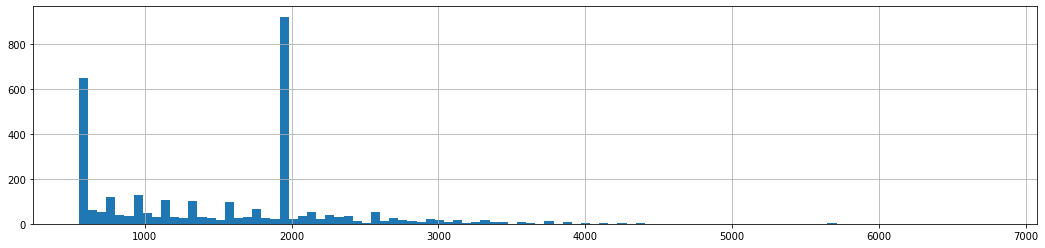

In [57]:
stat_data['revenue'].hist(figsize=(18,4), bins=100); # гистограмма выручки по пользователям

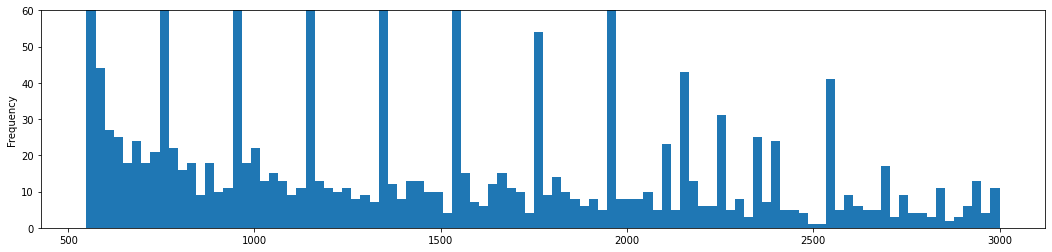

In [58]:
stat_data['revenue'].plot(kind='hist', figsize=(18,4), bins=100, range=(549, 3000), ylim=(0,60));

Видно, что пики основные приходятся на 550 и 1950 - это основные тарифы оператора. Из графика видно, что многим хватает данного функционала. Но заметно, что между этими двумя есть еще люди, которые доплачивают за те или иные услуги. До 1950 люди активнее докупают услуги, потом немного падает. В среднем за услуги связи абоненты платят в районе полторы тысячи рублей. Изучим подробно выручку и другие показатели в следующем шаге.

## Проанализируйте данные
Изучим поведение клиентов оператора, исходя из выборки: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 


In [59]:
ultra_data = stat_data.loc[stat_data['tariff'].isin(['ultra']) == True] # фильтр для ultra 
ultra_data

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff,revenue
0,1000,5,22,159,22,2256,3,Краснодар,ultra,"1,950.00"
1,1000,6,43,172,60,23257,23,Краснодар,ultra,"1,950.00"
2,1000,7,47,340,75,14016,14,Краснодар,ultra,"1,950.00"
3,1000,8,52,408,81,14070,14,Краснодар,ultra,"1,950.00"
4,1000,9,58,466,57,14581,15,Краснодар,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...
3204,1473,8,0,0,17,12917,13,Красноярск,ultra,"1,950.00"
3205,1473,9,0,0,19,17307,17,Красноярск,ultra,"1,950.00"
3206,1473,10,0,0,20,13703,14,Красноярск,ultra,"1,950.00"
3207,1473,11,0,0,14,21692,22,Красноярск,ultra,"1,950.00"


In [60]:
smart_data = stat_data.loc[stat_data['tariff'].isin(['smart']) == True] # фильтр для # smart
smart_data

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff,revenue
8,1001,11,59,430,0,18452,19,Москва,smart,"1,350.00"
9,1001,12,63,414,0,14053,14,Москва,smart,550.00
10,1002,6,15,117,4,10871,11,Стерлитамак,smart,550.00
11,1002,7,26,214,11,17601,18,Стерлитамак,smart,"1,150.00"
12,1002,8,42,289,13,20347,20,Стерлитамак,smart,"1,550.00"
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11066,11,Санкт-Петербург,smart,550.00
3210,1489,9,0,0,32,17232,17,Санкт-Петербург,smart,950.00
3211,1489,10,0,0,21,19588,20,Санкт-Петербург,smart,"1,550.00"
3212,1489,11,0,0,20,17516,18,Санкт-Петербург,smart,"1,150.00"


Из размера выборки сразу можем заметить, что клиентов на smart практически в 2 раза больше, чем ultra. 

Сперва посмотрми на минуты разговора пользователей разных тарифов

In [61]:
calls_ultra = ultra_data.pivot_table(index='month', values=['calls_sum'], aggfunc='mean') # среднее время звонков помесячно ultra

In [62]:
calls_ultra  # среднее время звонков помесячно ultra

,calls_sum
month,
1,428.11
2,297.12
3,489.65
4,458.02
5,510.33
6,479.70
7,545.79
8,510.78
9,539.44


In [63]:
calls_smart = smart_data.pivot_table(index='month', values=['calls_sum'], aggfunc='mean') # среднее время звонков помесячно ultra

In [64]:
calls_smart # среднее время звонков помесячно smart

,calls_sum
month,
1,203.85
2,298.69
3,390.05
4,367.13
5,387.36
6,395.64
7,408.35
8,421.47
9,428.61


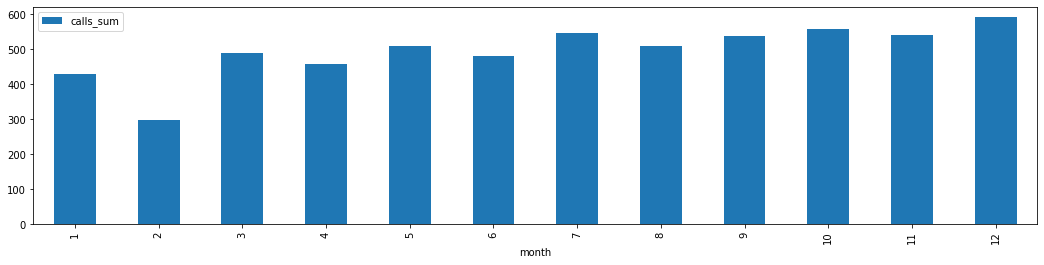

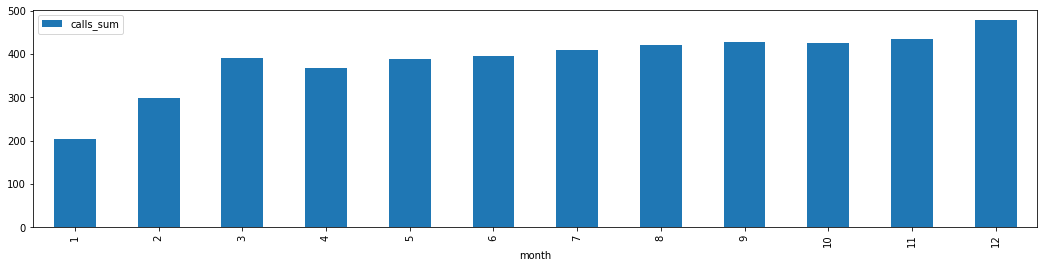

In [65]:
calls_ultra.reset_index().plot(kind='bar', x='month', y='calls_sum', figsize=(18,4)); # графики по месяцам
calls_smart.reset_index().plot(kind='bar', x='month', y='calls_sum', figsize=(18,4)); 

In [66]:
smart_data['calls_sum'].describe() # анализ звонков smart

count   2,229.00
mean      417.93
std       190.31
min         0.00
25%       282.00
50%       422.00
75%       545.00
max     1,435.00
Name: calls_sum, dtype: float64

In [67]:
smart_calls_limit = smart_data[smart_data['calls_sum'] > 500] # превышение минут тарифа
smart_calls_limit.count()

user_id        754
month          754
calls_count    754
calls_sum      754
messages       754
mb_used        754
gb_used        754
city           754
tariff         754
revenue        754
dtype: int64

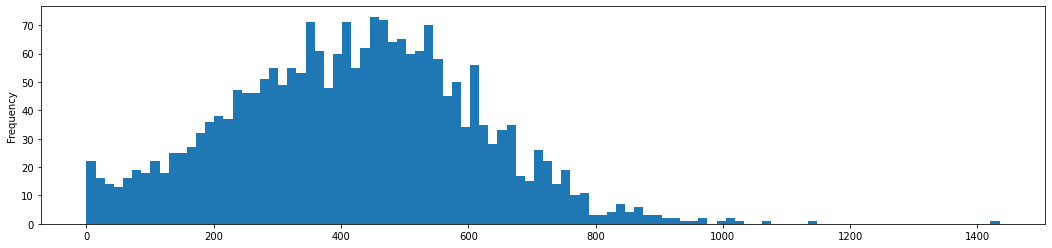

In [68]:
smart_data['calls_sum'].plot(kind='hist', figsize=(18,4), bins=100); # график ежемесячных звонков

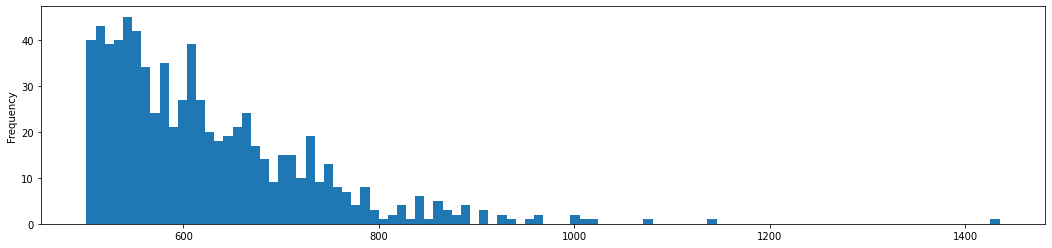

In [69]:
smart_calls_limit['calls_sum'].plot(kind='hist', figsize=(18,4), bins=100); # график превышения лимита

In [70]:
ultra_data['calls_sum'].describe() # анализ звонков ultra

count     985.00
mean      526.62
std       317.61
min         0.00
25%       284.00
50%       518.00
75%       752.00
max     1,673.00
Name: calls_sum, dtype: float64

Сразу заметно, что разговоры у smart пользователей меньше, чем у ultra. Среднее отличается на 20%. Стандартное отклонение различается: 190 у smart и 317 у ultra. Среднее отличается примерно на 60%. По смарту можем заметить, что из-за маленького количества минут в 30% случаях пользователям приходится докупать минуты. Визуально видно, что на лимит в 500 минут укладывается основная часть пользователей. Пользователям тарифа ultra хватает своего лимита, максимальное значение достигшает 1673 минуты, что примерно 55% лимита. Для абонентов, видимо, это очень много и потребности у абонентов в таком большом лимите нет.\
Перейдем к сообщениям.

In [71]:
messages_ultra = ultra_data.pivot_table(index='month', values=['messages'], aggfunc='mean') # сообщения ultra

In [72]:
messages_smart = smart_data.pivot_table(index='month', values=['messages'], aggfunc='mean') # сообщения smart

In [73]:
messages_ultra # сообщения ultra

,messages
month,
1,33.78
2,21.96
3,32.30
4,31.56
5,37.85
6,41.73
7,49.85
8,48.44
9,52.29


In [74]:
messages_smart # сообщения smart

,messages
month,
1,18.24
2,24.09
3,31.86
4,30.74
5,33.77
6,33.40
7,33.75
8,33.64
9,33.64


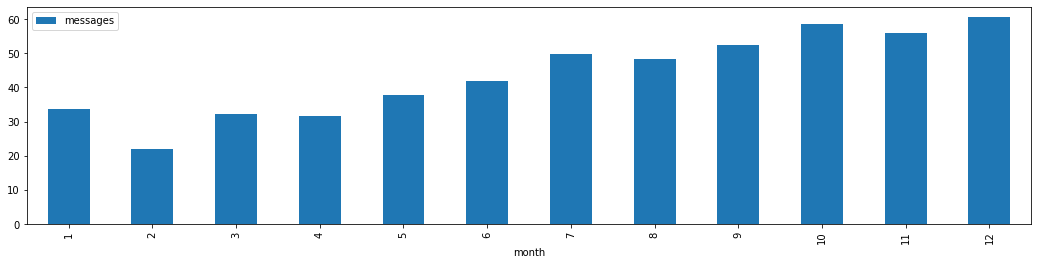

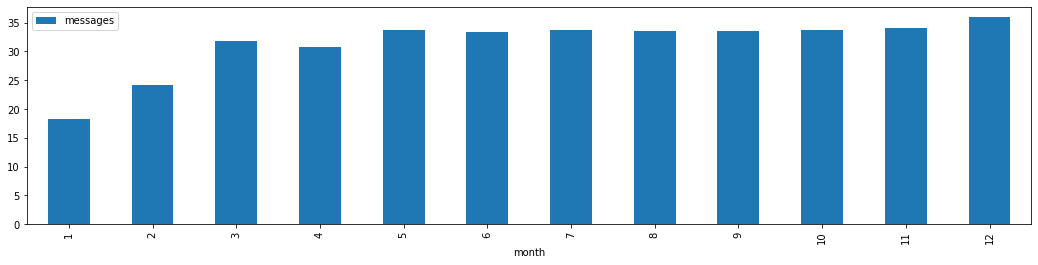

In [75]:
messages_ultra.reset_index().plot(kind='bar', x='month', y='messages', figsize=(18,4)); # графики по месяцам сообщений
messages_smart.reset_index().plot(kind='bar', x='month', y='messages', figsize=(18,4));

In [76]:
smart_data['messages'].describe() # анализ smart

count   2,229.00
mean       33.38
std        28.23
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: messages, dtype: float64

In [77]:
smart_messages_limit = smart_data[smart_data['messages'] > 50]
smart_messages_limit.count()

user_id        564
month          564
calls_count    564
calls_sum      564
messages       564
mb_used        564
gb_used        564
city           564
tariff         564
revenue        564
dtype: int64

In [78]:
ultra_data['messages'].describe() # анализ ultra

count   985.00
mean     49.36
std      47.80
min       0.00
25%       6.00
50%      38.00
75%      79.00
max     224.00
Name: messages, dtype: float64

Разница между средним smart и ultra так же в районе 20% как и у звонков. Стандартное отклонение различается на 60%. Даже по такой статистике видим, что в ultra к лимиту сообщений максимум и близко не приближается (лимит 1000, максимум 224), а абоненты smart тратят в среднем 60% своего лимита, но у них он составляет всего 50 сообщений. При этом у smart еще наблюдаются превышения лимита сообщений в 25% случаев. Далее рассмотрим интернет трафик.

In [79]:
internet_ultra = ultra_data.pivot_table(index='month', values=['gb_used'], aggfunc='mean') # сообщения ultra

In [80]:
internet_smart = smart_data.pivot_table(index='month', values=['gb_used'], aggfunc='mean') # сообщения ultra

In [81]:
internet_ultra

,gb_used
month,
1,13.33
2,12.00
3,17.70
4,17.00
5,19.43
6,18.96
7,20.54
8,19.64
9,19.25


In [82]:
internet_smart

,gb_used
month,
1,8.74
2,11.84
3,15.25
4,13.64
5,15.94
6,15.98
7,15.91
8,16.78
9,16.42


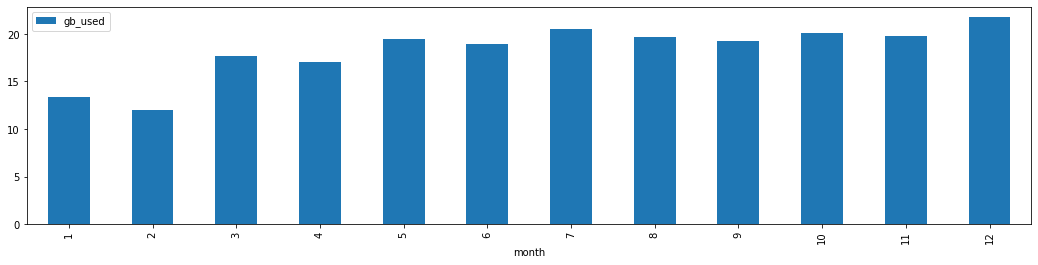

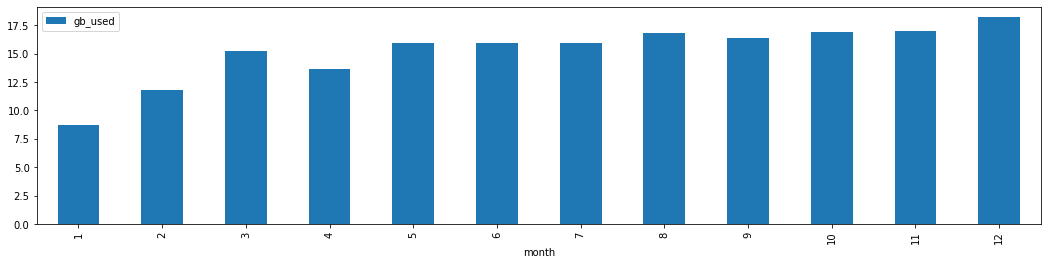

In [83]:
internet_ultra.reset_index().plot(kind='bar', x='month', y='gb_used', figsize=(18,4)); # графики по месяцам сообщений
internet_smart.reset_index().plot(kind='bar', x='month', y='gb_used', figsize=(18,4));

In [84]:
smart_data['gb_used'].describe() # анализ smart

count   2,229.00
mean       16.36
std         5.76
min         0.00
25%        13.00
50%        17.00
75%        20.00
max        38.00
Name: gb_used, dtype: float64

In [85]:
smart_internet_limit = smart_data[smart_data['gb_used'] > 15]
smart_internet_limit.count()

user_id        1309
month          1309
calls_count    1309
calls_sum      1309
messages       1309
mb_used        1309
gb_used        1309
city           1309
tariff         1309
revenue        1309
dtype: int64

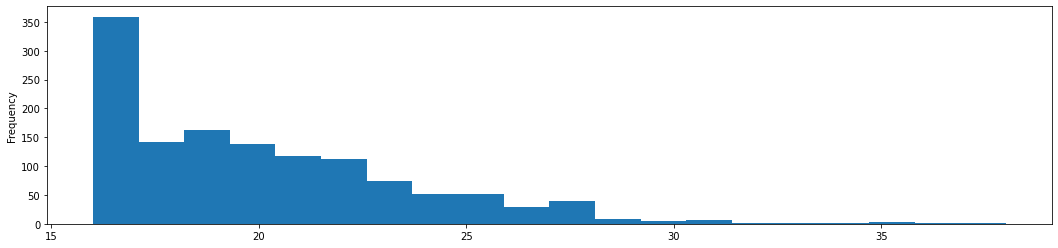

In [86]:
smart_internet_limit['gb_used'].plot(kind='hist', figsize=(18,4), bins=20);

In [87]:
ultra_data['gb_used'].describe() # анализ ultra

count   985.00
mean     19.53
std       9.87
min       0.00
25%      12.00
50%      19.00
75%      27.00
max      49.00
Name: gb_used, dtype: float64

In [88]:
ultra_internet_limit = ultra_data[ultra_data['gb_used'] > 30]
ultra_internet_limit.count()

user_id        134
month          134
calls_count    134
calls_sum      134
messages       134
mb_used        134
gb_used        134
city           134
tariff         134
revenue        134
dtype: int64

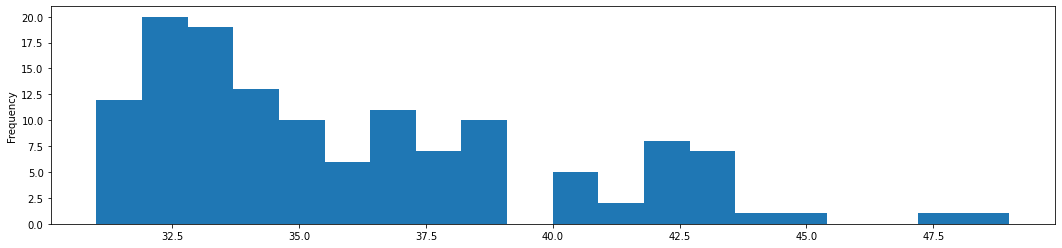

In [89]:
ultra_internet_limit['gb_used'].plot(kind='hist', figsize=(18,4), bins=20); # график превышения лимита

Можно заметить, что среднее отличается на 20 - у ultra 20гб, a smart - 16гб. Это сразу нам говорит о том, что пользователи smart тарифа более склонны полностью использовать свой лимит, в отличии от ultra, где используется в среднем только треть. По максимуму видно, что и пользователи smart и ultra приходится дополнительно докупать трафик. Процент дополнительных продаж у smart и ultra составляют 59% и 14% соответственно.

Из этих данных можем сделать вывод, что основной прибыльной доп. функцией является интернет, т.к. более половины пользователей тарифа smart часто приходится дполачивать за трафик. В среднем пользователи тарифа ultra свои лимиты не расходуют, но при этом 14% используют увеличение лимита. За разговоры и сообщения абоненты smart тоже доплачивают чаще, чем ultra, хотя вторые кроме интернета лимиты не превышают.

## Проверька гипотез
•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;\
•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.\
Пороговое значение alpha задайте самостоятельно.\
Поясните:\
•	как вы формулировали нулевую и альтернативную гипотезы;\
•	какой критерий использовали для проверки гипотез и почему.


### Гипотеза 1
<b>Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</b>\
Проверим через гипотезу о равенстве средних двух генеральных совокупностей. Так как мы имеем две генеральные совокупности, то этот метод нам как раз подходит. Сформируем нулевую и альтернатвную гипотезу:\
Нулевая гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;\
Альтернативная гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.\
Критический уровень статистической значимости выберем 5%, этого уровня для задачи нам хватит.

In [90]:
alpha = .05  # проверяем гипотезы

results_one = st.ttest_ind(smart_data['revenue'], ultra_data['revenue'])

print('p-значение:', results_one.pvalue)

if results_one.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Гипотеза не подтвердилать что и потдверждают наши вычесленные значения средних

### Гипотеза 2

<b>Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</b>\
Сделаем 2 фильтра по городам: с Москвой и с другими городами.

In [91]:
moscow_data = stat_data[stat_data['city'] == 'Москва']
not_moscow_data = stat_data[stat_data['city'] != 'Москва']
display(moscow_data)
display(not_moscow_data)

,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff,revenue
8,1001,11,59,430,0,18452,19,Москва,smart,"1,350.00"
9,1001,12,63,414,0,14053,14,Москва,smart,550.00
17,1003,8,55,380,37,8571,9,Москва,ultra,"1,950.00"
18,1003,9,134,961,91,12479,13,Москва,ultra,"1,950.00"
19,1003,10,108,855,83,14779,15,Москва,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...
3120,1490,8,45,346,50,17295,17,Москва,smart,950.00
3121,1490,9,44,322,48,14838,15,Москва,smart,550.00
3122,1490,10,42,312,45,20690,21,Москва,smart,"1,750.00"
3123,1490,11,38,282,47,18733,19,Москва,smart,"1,350.00"


,user_id,month,calls_count,calls_sum,messages,mb_used,gb_used,city,tariff,revenue
0,1000,5,22,159,22,2256,3,Краснодар,ultra,"1,950.00"
1,1000,6,43,172,60,23257,23,Краснодар,ultra,"1,950.00"
2,1000,7,47,340,75,14016,14,Краснодар,ultra,"1,950.00"
3,1000,8,52,408,81,14070,14,Краснодар,ultra,"1,950.00"
4,1000,9,58,466,57,14581,15,Краснодар,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11066,11,Санкт-Петербург,smart,550.00
3210,1489,9,0,0,32,17232,17,Санкт-Петербург,smart,950.00
3211,1489,10,0,0,21,19588,20,Санкт-Петербург,smart,"1,550.00"
3212,1489,11,0,0,20,17516,18,Санкт-Петербург,smart,"1,150.00"


В этом примере так же имеются две генеральные совокупности, поэтому и метод выбран тот же.
Сформируем нулевую и альтернатвную гипотезу:\
Нулевая гипотеза: Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов;\
Альтернативная гипотеза: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов\
Критический уровень статистической значимости выберем так же 5%.

In [92]:
alpha_two = 0.05  # проверяем гипотезы

results_two = st.ttest_ind(moscow_data['revenue'], not_moscow_data['revenue'])

print('p-значение:', results_two.pvalue)

if results_two.pvalue < alpha_two:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


По результатам видим, что значение выше критического уровня, поэтому гипотезу отвергнуть не получилось..

## Общий вывод

По анализу можем сделать ряд выводов:
- На тарифе ultra услуги потребляются в бОльшем количестве, чем smart, но лимиты абонентами в среднем не сьедаются и их хватает;
- Активно пользуются интернетом все пользователи тарифа, но абонентам smart приходтися в среднем больше доплачивать за дополнительный трафик;
- В основном клиенты мало пользуются сообщениями в обоих тарифах, но по smart и тут есть увеличение  лимитов;

Проверяя гипотезы мы подтвердили:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

В целом видно, что пользователи в основном предпочитают smart. У ultra для его услуг завышена стоимость: в основном абоненты не пользуются смс и включение такого кол-ва в пакет не добавляет ему привлекательности. С минутами то же самое: У абонентов ultra спрос на звонки выше лишь на 20%, а между тарифами разница почти в 6 раз больше. С интернетом у пользоваетелей smart чувствуется спрос на больший трафик, у ultra и с этим параметром все хорошо.
Из двух тарифов, учитывая и стоимость и количество абонентов можем уверено сказать, что smart более популярный тариф. Учитывая, что к нему часто докупают услуги интернета, у него есть потенциял доп. продаж. Дополнительных продаж у ультра гораздо меньше и самих абонентов почти в 2 раза меньше, хотя и присутствуют аномалии в виде абонента с ежемесячной оплатой более 6000 рублей.

Для рекламы и развития лучше выбрать тариф smart, т.к. у людей он уже является яболее популярный, доступным, все услуги связи и сообщений он покрывает. Для широкой аудитории данный тариф будет выигрышнее, чем ultra, тем более мы выяснили, что выручка в регионах у тарифов меньше, поэтому более доступный тариф будем плюсом.
